<a href="https://colab.research.google.com/github/saileshraturi/DigitRecognitionusingTensorFlow/blob/master/DigitRecognitionUsingTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist

In [13]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train,x_test = x_train/255.0,x_test/255.0

In [15]:
print("X_train.shape:",x_train.shape)
print("Y_train.shape:",y_train.shape)
print(x_test.shape)
print(y_test.shape)

X_train.shape: (60000, 28, 28)
Y_train.shape: (60000,)
(10000, 28, 28)
(10000,)


In [0]:
#Build the Model( NN with two layers (Relu and softmax))

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape =(28,28)),#convert the input into 2 dimensional array = N(60000) * 784
                                    tf.keras.layers.Dense(128,activation='relu'),#hyperparamenter 128 experimental
                                    tf.keras.layers.Dropout(0.2),# Drop the neurons by 20 percent in the layer randomly
                                    tf.keras.layers.Dense(10,activation='softmax')# total output classes are 10 and softmax function is for multiclass classification


])

In [0]:
#compile the model

model.compile(optimizer='adam', #adam for calculating Gradient descent
              loss = 'sparse_categorical_crossentropy',# loss function for multiclass classification 
              metrics = ['accuracy'])# metric used is accuracy in case of classification(comparing probabilities between actual and predicted result like disease or no disease)

In [18]:
#Train the model

r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.9131 - val_loss: 0.1460 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1443 - accuracy: 0.9582 - val_loss: 0.1047 - val_accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1086 - accuracy: 0.9670 - val_loss: 0.0881 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9728 - val_loss: 0.0791 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9758 - val_loss: 0.0740 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9783 - val_loss: 0.0721 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0564 - accuracy: 0.9823 - val_loss: 0.0713 - val_accuracy:

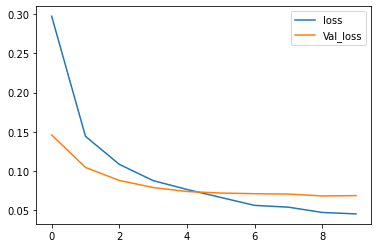

In [19]:
#Visualizing loss per iteration
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label = 'Val_loss')
plt.legend()

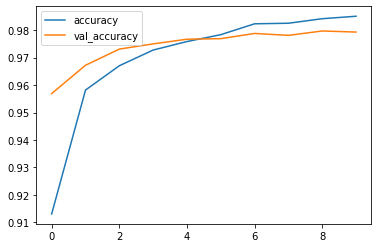

In [20]:
#visualizing accuracy per iteration
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [21]:
#Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9793
[0.0687948688864708, 0.9793000221252441]


In [0]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt


confusion matrix without normalization
[[ 966    0    2    0    1    1    3    1    3    3]
 [   0 1122    4    0    0    0    2    0    7    0]
 [   2    1 1018    1    0    0    2    1    6    1]
 [   0    0    6  991    0    4    0    2    4    3]
 [   1    0    0    1  959    0    4    2    2   13]
 [   3    0    1   15    1  859    6    1    4    2]
 [   4    3    1    1    4    5  939    0    1    0]
 [   1    6   12    0    0    0    0 1002    4    3]
 [   3    0    1    2    2    3    0    3  957    3]
 [   1    4    1    6    7    2    0    5    3  980]]


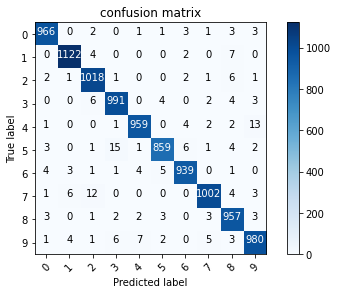

In [30]:
def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = 'confusion matrix',
                          cmap =plt.cm.Blues):
  #This function print and plot the confusion matrix
  if normalize:
      cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('confusion matrix without normalization')
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j],fmt),
               horizontalalignment='center',
               color = 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis =1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))


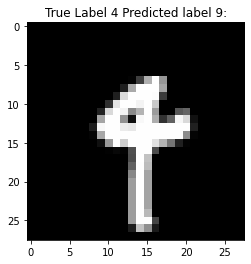

In [34]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label %s Predicted label %s:"% (y_test[i],p_test[i]));